# 1. 데이터셋 불러오기
- train, test 비율 7:3

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()
# X, y = wine.data, wine.target
wine_df = pd.DataFrame(data = wine['data'], columns = wine['feature_names'])
wine_df.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine['data']
                                                    , wine['target']
                                                    , test_size = 0.3
                                                    , shuffle = True
                                                    , random_state = 42)

In [5]:
print(wine['data'].shape, wine['target'].shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(178, 13) (178,) (124, 13) (54, 13) (124,) (54,)


# 2. Diabetes 데이터 회귀 분석 진행하기
- 선형 회귀 모델, Polynomial(다항) 회귀 모델

- 442 명의 당뇨병 환자의 데이터
- 각 변수에 대해 1년 후 질병이 진행되는 정도

## 선형 회귀
- ~~mi 지수 X에 대한 질병 진행도 y 회귀 분석~~

-- 변수를 직접 할당하기보다 모델이 다양한 데이터셋에 대해 잘 작동할 수 있도록 작성하기

In [127]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
# df = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)
# df.head(3)

#! 변수 할당
X, y = diabetes.data, diabetes.target
# 데이터셋 정보
data_info = {
    "Features": diabetes.feature_names,
    "Number of Samples": X.shape[0],
    "Number of Features": X.shape[1],
    "Target Variable": "Progression of diabetes after one year"
}

data_info

{'Features': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
 'Number of Samples': 442,
 'Number of Features': 10,
 'Target Variable': 'Progression of diabetes after one year'}

In [128]:
# target = diabetes.target
# target_df = pd.DataFrame(target)
# target_df.rename(columns={0:'target'}, inplace=True)
# target_df.head(3)

In [129]:
# df =pd.concat([df, target_df], axis= 1)
# df.head(3)

In [130]:
# import matplotlib.pyplot as plt
# plt.scatter(df['bmi'], df['target'])
# plt.xlabel('bmi')
# plt.ylabel('target')

In [131]:
# 변수 정의 
# X= df[['bmi']]
# y= df[['target']]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(309, 10) (133, 10) (309,) (133,)


In [132]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
# 선형- transform할 필요 없음

LinearRegression()

# 사이킷런 모델의 특징 - 동일한 형태로 나타남

1. 모델 이름으로 클래스를 만들어줌 
    - linear_regressor = **LinearRegression()**
    클래스에 괄호를 쳐주면 그 클래스를 설계도로 하는 **객체** 생성
2. 클래스 속의 **fit** 함수를 사용한 다음  
3. **학습하고자** 하는 종속 변수와 학습하고자 하는 독립 **변수를 넣어줌**
    - linear_regressor.fit(X_train, y_train)  
    -> 모델은 학습된 상태로 클래스에 저장됨
    **객체는 학습된 상태로 변환됨**
4. 클래스. 객체에 접근해서 predict 사용해서 예측하고자 하는 독립 변수를 넣어주게 되면 예측 결과를 알 수 있음
    - linear_regressor.predict(X_test)
    **학습된 객체를 사용**하기 위해 predict 메서드 사용  
    괄호 안에는 실제로 예측하고 싶은 정보(사전에 남겨놓은 X_test)

In [133]:
y_pred_linear = linear_regressor.predict(X_test)

y_pred_linear

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

In [134]:
# MSE 계산
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_linear)
mse.round(2)
# XX bmi에 따른 당뇨 진행도 MSE: 3884.94
# 선형회귀 MSE: 2821.75

2821.75

In [149]:
#! 이렇게 잘 맞췄는지 경향성을 보는 방법도 있음.
print(y_test)
print(y_pred_linear)

[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.  94. 252.  99. 297.
 135.  67. 295. 264. 170. 275. 310.  64. 128. 232. 129. 118. 263.  77.
  48. 107. 140. 113.  90. 164. 180. 233.  42.  84. 172.  63.  48. 108.
 156. 168.  90.  52. 200.  87.  90. 258. 136. 158.  69.  72. 171.  95.
  72. 151. 168.  60. 122.  52. 187. 102. 214. 248. 181. 110. 140. 202.
 101. 222. 281.  61.  89.  91. 186. 220. 237. 233.  68. 190.  96.  72.
 153.  98.  37.  63. 184. 144. 150. 280. 125.  59.  65. 281. 277. 167.
  90.  72. 178.  88. 270. 101. 197.  97.  53.  71. 262.  52. 102. 166.
 189. 173. 220. 206.  97.  60.  61. 242. 121. 128. 104. 265. 132. 283.
 174. 129. 257. 137.  63.  93. 232.]
[138.46970031 181.10052342 125.34400904 292.75977277 123.8830531
  91.89830434 257.26463123 177.76169318  84.98549706 109.15960992
  94.4855284  166.13235108  57.40742502 206.13897354  97.7811842
 131.00472765 214.29789972 252.52907661 199.66656381 219.49985634
 203.23671317  88.00656925  70.65108459 186.92233427 155.81266

In [135]:
# plt.scatter(df['bmi'], df['target'])
# plt.xlabel('bmi')
# plt.ylabel('target')
# plt.plot(X_test, y_pred, color= 'r')

In [136]:
# # r2 score
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_pred)
# r2.round(2)
# # R-squared: 0.28

## 다항 회귀
- ~~X: age, sex 제외 모든 변수~~
- y: target


--> 변수 선택 X

In [137]:
# df.info()

In [145]:
# X_all = df[['bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
# y_all = df[['target']]
# X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.3, random_state=42)
# model_all = LinearRegression()
# model_all.fit(X_train_all, y_train_all)
from sklearn.preprocessing import PolynomialFeatures

# 4. Polynomial Regression 모델 학습 및 예측
poly = PolynomialFeatures(degree=2) # 선형회귀의 적당한 숫자를 찾아주는 것이 PolynomialFeatures
# degree=1 : 선형
X_poly_train = poly.fit_transform(X_train)
# 훈련 데이터는 학습하고 변환
X_poly_test = poly.transform(X_test)
# 테스트 데이터는 변환만 ! 학습 X

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly_train, y_train)
# 데이터를 바꿔줬기 때문에 (X_poly_train)
# Polynomial을 선형으로 학습 가능 (LinearRegression 사용)
y_pred_poly = poly_regressor.predict(X_poly_test)

In [146]:
# y_pred_all = model_all.predict(X_test_all)

In [147]:
# # MSE 계산
# mse_all = mean_squared_error(y_test_all, y_pred_all)
# mse_all.round(2)
# # 다항회귀 MSE: 2871.19

mse_poly = mean_squared_error(y_test, y_pred_poly)

print(mse_poly)

3168.9304439471757


In [20]:
# # r2 score
# r2_all = r2_score(y_test_all, y_pred_all)
# r2_all.round(2)
# # R-squared: 0.47

0.47

해당 문제에서는 Accuracy를 사용하면?
- Accuracy: 분류 지표라서 사용하지 못한다.
- ~~결과값을 분류한다면...? 사용 가능할수도 있다고 예상된다.~~
- ~~군집화 K-means clustering~~

In [21]:
# from sklearn.metrics import accuracy_score
# df_kmeans = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']]
# df_kmeans.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [22]:
# from sklearn.cluster import KMeans
# kmeans= KMeans(n_clusters= 3, init= 'k-means++', max_iter= 300, random_state= 42)
# kmeans.fit(df_kmeans)

c:\Users\h1029\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [23]:
# df_kmeans['kmeans']= kmeans.labels_
# df_kmeans

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,kmeans
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,2
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,2
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,2
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,2
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0,0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0,2
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0,1


# 회귀에서 Accuracy를 사용할 때의 문제점

accuracy= 분류할 때 정확성을 검증하기 위해 사용 (모델이 올바르게 예측한 데이터 비율)  
하지만 선형회귀는 연속적인 데이터  
-> 데이터의 연속성에 따라 분류가 명확하지 않음.

e.g) 개, 고양이는 명확한 데이터 레이블이 있어서 올바르게 예측한 것을 평가할 수 있음.  
그러나 키를 171로 예측한 거랑 171.1로 예측한 거랑 Accuracy 값이 다르게 나올 것. Accuract 값이 굉장히 작게 나올 것.

연속적인 데이터를 각각 레이블과 정확히 일치하는지 보는 것은 구현적으로 깔끔하지 않음.  
-> Accuray로 회귀 문제를 평가하면 정확한 성능을 얻을 수 없을 뿐더러, 코드적으로 문제가 생길 수 있다.

# 3. iris데이터 DecisionTree로 분류하기

In [150]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.datasets import load_iris
iris = load_iris()
# iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
# iris_df.head(3)

In [151]:
# iris_df.info()
# iris.target_names

In [152]:
# iris_df['class']= iris.target
# iris_df

In [153]:
# X_features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# X= iris_df[X_features]
# y= iris_df['class']

X, y = iris.data, iris.target

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [166]:
# 3. DecisionTree 모델 학습
decision_tree = RandomForestClassifier(random_state=42)

# tree_iris= DecisionTreeClassifier(random_state= 42) # max_depth 조절 - 성능 업
tree_iris.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [167]:
y_pred= tree_iris.predict(X_test)

In [168]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# accuracy: 1.0

1.0

In [160]:
# from sklearn.tree import plot_tree

# import matplotlib.pyplot as plt
# plt.figure(figsize = (10,5))
# plot_tree(tree_iris, feature_names=X_features, class_names=['setosa', 'versicolor', 'virginica'], filled= True)

# 4. 타이타닉 데이터 불러오기 및 전처리하기

In [161]:
# pip install kaggle --upgrade

In [162]:
# 캐글 데이터셋 홈페이지 내 API 주소 복사/붙여넣기. 
# !kaggle competitions download -c titanic 

In [163]:
# 압축해제하는 코드

# import shutil

# filename = 'titanic.zip' # 압축 해제할 파일 이름
# extrac_dir = 'titanic' # 압축 해제할 폴더 이름
# archive_format = 'zip' # 압축 파일 형태

# shutil.unpack_archive(filename, extrac_dir, archive_format)

In [169]:
#  titanic/ 폴더에 있는 모든 파일과 폴더의 이름이 리스트로 나열됨

# import os

# os.listdir('titanic/')

['gender_submission.csv', 'test.csv', 'train.csv']

In [165]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

## 1번 수치형 데이터
- train_1

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
train_1 = train[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
train_1.info()
# Age 결측치 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


--> 판다스로 하나하나 보는 방법.

In [172]:

# 수치형 데이터와 비수치형 데이터로 분류
numeric_features = train.select_dtypes(include=['int64', 'float64'])
non_numeric_features = train.select_dtypes(exclude=['int64', 'float64'])

# 1번 데이터셋: 수치형 데이터만 포함, 'Survived' 컬럼 제외 -- 학습 데이터에 정답이 있으면 안되기 떄문에
X_numeric = numeric_features.drop(columns=['Survived'])
y_numeric = numeric_features['Survived']


## 2번 비수치형+수치형 데이터
- train_2

In [170]:
import copy

train_2= copy.deepcopy(train)
# 깊은 복사 - 완전하게 따로 만들어 내는 것 
# -- 원본 객체가 변경되어도 복사본에는 영향 X, 모든 하위 객체가 독립적으로 존재

# train_2= train.copy()
# 얕은 복사 - 원복 객체의 첫 번째 레벨만 복사
# 하위 객체들은 원본과 여전히 연결돼있음 --
# 원본 객체의 변경은 복사본에 영향을 줄 수 있음
# 마찬가지로 하위 객체를 변경하면 원본 객체에도 영향 미침
# --------
# original = [[1, 2], [3, 4]]  # 원본 리스트
# shallow_copy = original.copy()  # 얕은 복사

# # 리스트 구조는 복사되지만, 내부 리스트는 동일한 참조를 가짐
# shallow_copy[0][0] = 99  # 복사본의 내부 요소를 변경

# print(original)  # [[99, 2], [3, 4]] - 원본도 영향을 받음
# print(shallow_copy)  # [[99, 2], [3, 4]] - 복사본도 변경됨
# ------

# train_2= train
# 단순 대입. 같은 객체 참조. 두 변수는 동일한 객체를 가짐
# 어느 한 쪽에서 변경하면 다른 쪽에도 영향을 미침.

In [176]:
# 2번 데이터셋: 비수치형 데이터도 포함하여 전처리
# 비수치형 데이터를 일괄로 처리 (예: 인코딩)
titanic_non_numeric = non_numeric_features.copy()

# 'Sex'와 'Embarked'를 수치형으로 인코딩
titanic_non_numeric['Sex'] = titanic_non_numeric['Sex'].map({'male': 0, 'female': 1})
#! 맵핑해서 강제로 숫자 바꾸는 건 조심하자. 숫자 자체는 0보다 1이 큰, 의미가 있으니까 
titanic_non_numeric = pd.get_dummies(titanic_non_numeric, columns=['Embarked'], drop_first=True)
# print(titanic_non_numeric)

# 수치형 데이터와 비수치형 데이터를 결합하여 2번 데이터셋 생성
X_combined = pd.concat([X_numeric, titanic_non_numeric], axis=1)
y_combined = y_numeric  # y 값은 동일

# 비수치형 데이터에서 문자열 칼럼을 제거 (Name, Ticket, Cabin)
X_combined = X_combined.drop(columns=['Name', 'Ticket', 'Cabin'])

# 1번 데이터셋과 2번 데이터셋을 학습 및 테스트 데이터로 구분
X1_train, X1_test, y1_train, y1_test = train_test_split(X_numeric, y_numeric, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_combined, y_combined, test_size=0.3, random_state=42)

print(X1_train.shape, X1_test.shape, X2_train.shape, X2_test.shape)


# NaN 값을 각 열의 평균값으로 대체
X1_train.fillna(X1_train.mean(), inplace=True)
X1_test.fillna(X1_test.mean(), inplace=True)
X2_train.fillna(X2_train.mean(), inplace=True)
X2_test.fillna(X2_test.mean(), inplace=True)

(623, 6) (268, 6) (623, 9) (268, 9)


In [171]:
# train_2 = train.copy()
train_2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

결측치 존재하는 컬럼
- Age
- Cabin
- Embarked

In [41]:
train_2.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- Age: mean 값으로 처리
- Cabin: 204개 중 unique 값이 147개, 빈도가 4니까 컬럼 삭제
- Embarked: 889개 중 빈도가 644니까 해당 데이터인 S로 처리

In [42]:
# Age 처리
train_2['Age'] = train_2.loc[:, ['Age']].fillna(train_2['Age'].mean().round())
train_2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
# Cabin 삭제
del train_2['Cabin']

In [44]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [45]:
# Embarked 처리
train_2['Embarked']= train_2.loc[:, 'Embarked'].fillna('S')
train_2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [46]:
train_2.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


분석할 때 Name, Ticket, PassengerId 값은 필요하지 않을 것 같다.
- Name, Ticket, PassengerId 컬럼 삭제

In [47]:
del train_2['Name']
del train_2['Ticket']
del train_2['PassengerId']

In [48]:
train_2.info()
train_2.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


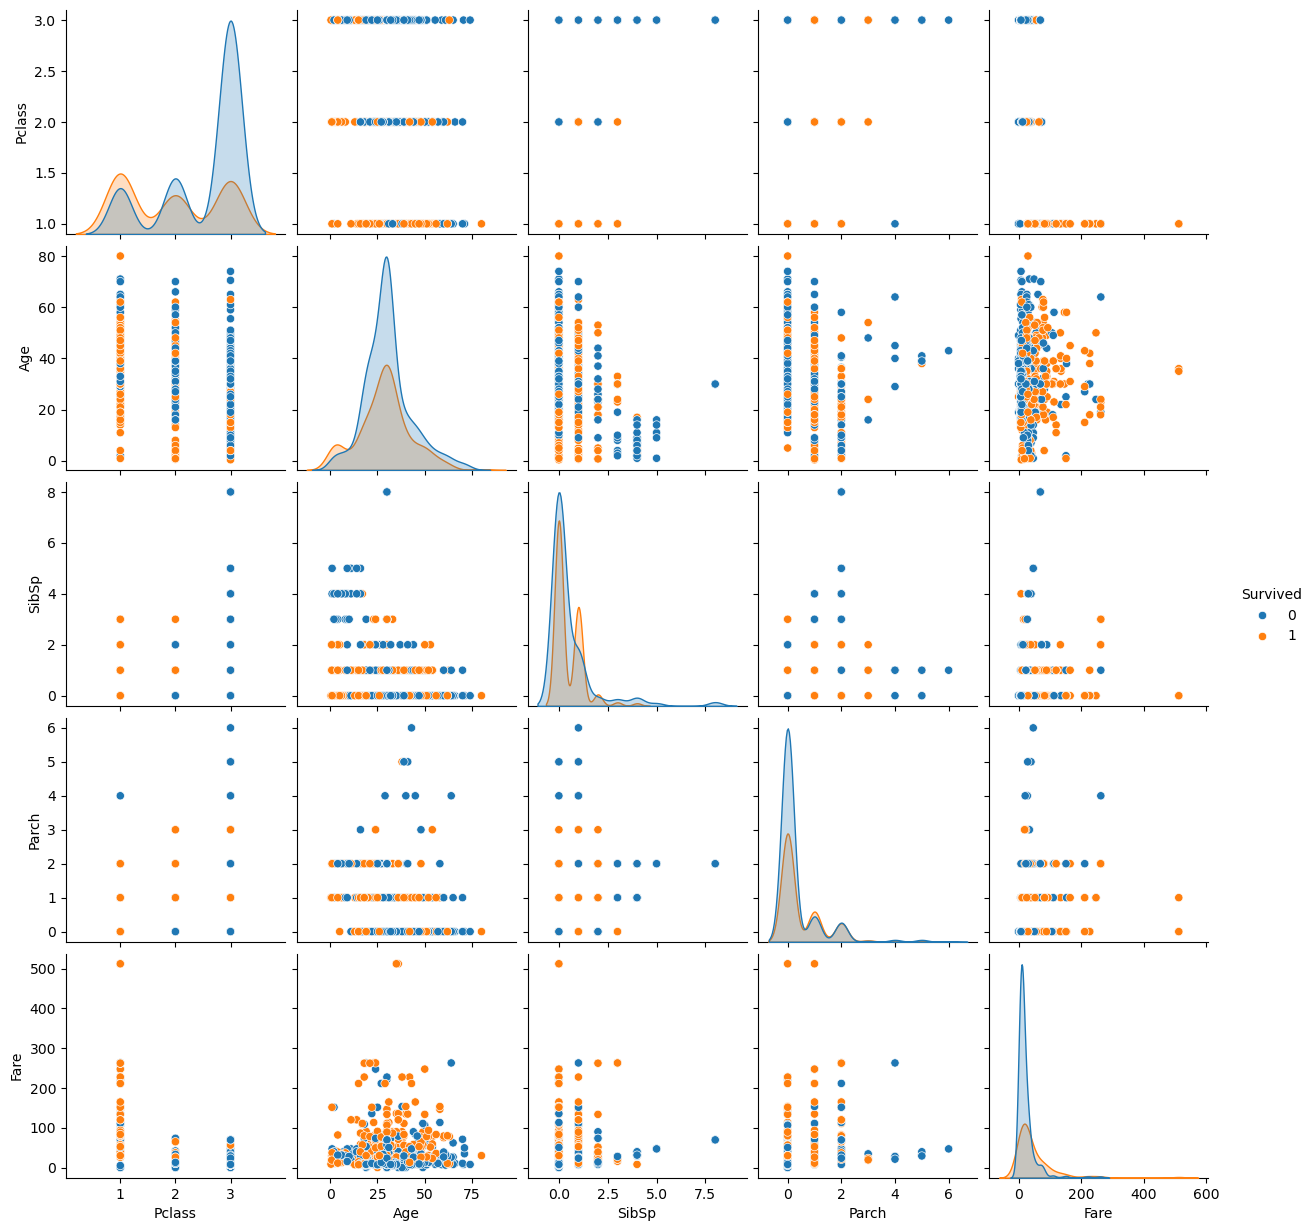

In [49]:
sns.pairplot(train_2, hue= 'Survived')

<Axes: ylabel='Fare'>

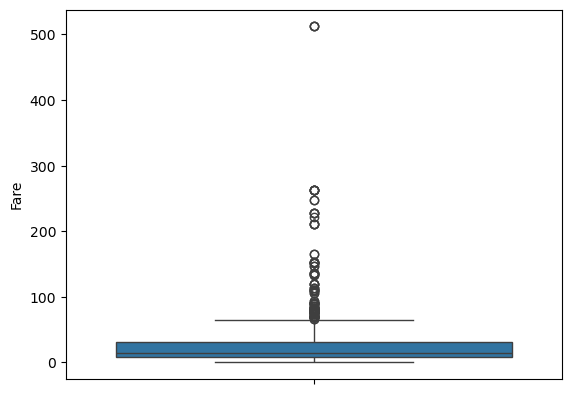

In [50]:
# Fare의 분포 확인
sns.boxplot(train_2['Fare'])
# 500 언저리 값 이상치로 판단

In [51]:
# Fare 기준 내림차 확인
train_2.sort_values(by='Fare', ascending=False).iloc[:10]
# 512값 3개 존재.  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
88,1,1,female,23.0,3,2,263.0000,S
27,0,1,male,19.0,3,2,263.0000,S
341,1,1,female,24.0,3,2,263.0000,S
438,0,1,male,64.0,1,4,263.0000,S
311,1,1,female,18.0,2,2,262.3750,C
742,1,1,female,21.0,2,2,262.3750,C
118,0,1,male,24.0,0,1,247.5208,C


In [52]:
# 258, 737, 679 데이터 삭제.
train_2 = train_2[train_2['Fare'] != 512.3292]

In [53]:
train_2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [54]:
train_2.sort_values(by='Fare', ascending=False).iloc[:10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.0,3,2,263.0000,S
341,1,1,female,24.0,3,2,263.0000,S
438,0,1,male,64.0,1,4,263.0000,S
88,1,1,female,23.0,3,2,263.0000,S
742,1,1,female,21.0,2,2,262.3750,C
311,1,1,female,18.0,2,2,262.3750,C
118,0,1,male,24.0,0,1,247.5208,C
299,1,1,female,50.0,0,1,247.5208,C
716,1,1,female,38.0,0,0,227.5250,C
700,1,1,female,18.0,1,0,227.5250,C


<Axes: ylabel='Fare'>

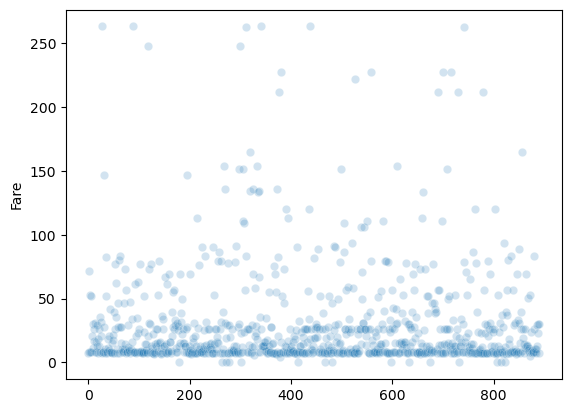

In [55]:
sns.scatterplot(train_2['Fare'], alpha= 0.2)

각각의 데이터 분포 확인

<Axes: ylabel='Age'>

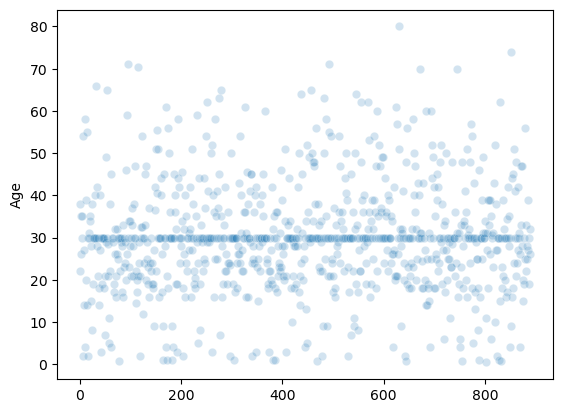

In [56]:
sns.scatterplot(train_2['Age'], alpha= 0.2)

<Axes: ylabel='SibSp'>

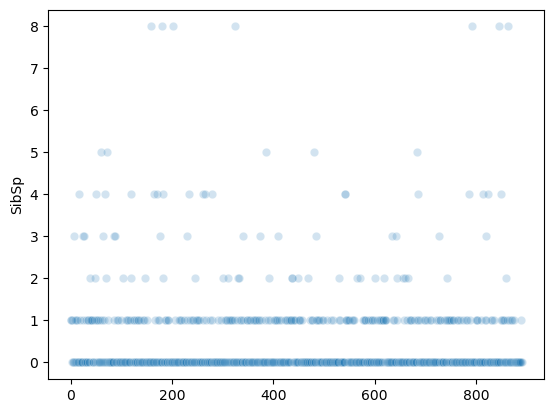

In [57]:
sns.scatterplot(train_2['SibSp'], alpha= 0.2)

<Axes: ylabel='Parch'>

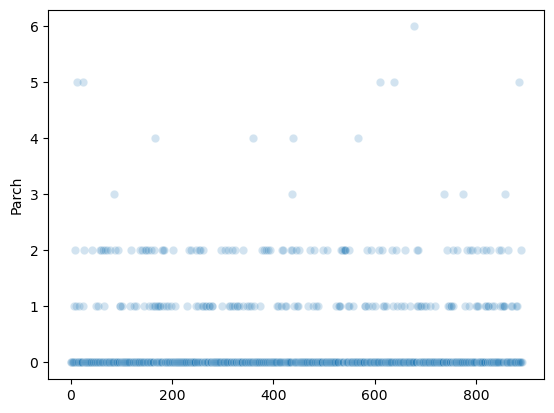

In [58]:
sns.scatterplot(train_2['Parch'], alpha= 0.2)


### 인코딩

- 인코딩: Sex, Embarked
    - 레이블 인코딩: Sex
    - 원핫 인코딩: Embarked

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [60]:
le= LabelEncoder()
train_2['Sex_le'] = le.fit_transform(train_2[['Sex']])
train_2.head()

c:\Users\h1029\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\h1029\AppData\Local\Temp\ipykernel_23348\2866849171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2['Sex_le'] = le.fit_transform(train_2[['Sex']])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_le
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [61]:
del train_2['Sex']

In [62]:
oe= OneHotEncoder()
oe.fit(train_2[['Embarked']])
embarked_csr= oe.transform(train_2[['Embarked']])
embarked_csr_train_2 = pd.DataFrame(embarked_csr.toarray(), columns = oe.get_feature_names_out())
train_2= pd.concat([train_2, embarked_csr_train_2], axis= 1)
train_2.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_le,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,S,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,C,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,S,0.0,0.0,0.0,1.0


In [63]:
del train_2['Embarked']

In [64]:
train_2.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0


In [65]:
train_2.isna().sum()

Survived      3
Pclass        3
Age           3
SibSp         3
Parch         3
Fare          3
Sex_le        3
Embarked_C    3
Embarked_Q    3
Embarked_S    3
dtype: int64

In [66]:
train_2= train_2.dropna()
train_2.isna().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_le        0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### 스케일링

- 스케일링: Age, SibSp, Parch, Fare
    - 표준화: 스탠다드 스케일러: SibSp, Parch
    - 정규화 : 민맥스 스케일러: Age, Fare
    - Pclass 는 그대로 사용

In [67]:
sd_sc= StandardScaler()
train_2['SibSp_sdsc']= sd_sc.fit_transform(train_2[['SibSp']])
train_2['Parch_sdsc']= sd_sc.fit_transform(train_2[['Parch']])

In [68]:
mm_sc= MinMaxScaler()
train_2['Age_mmsc']= mm_sc.fit_transform(train_2[['Age']])
train_2['Fare_mmsc']= mm_sc.fit_transform(train_2[['Fare']])

In [69]:
train_2.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_le,Embarked_C,Embarked_Q,Embarked_S,SibSp_sdsc,Parch_sdsc,Age_mmsc,Fare_mmsc
0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.429467,-0.472550,0.271174,0.027567
1,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,0.429467,-0.472550,0.472229,0.271039
2,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,-0.475481,-0.472550,0.321438,0.030133
3,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0,0.429467,-0.472550,0.434531,0.201901
4,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,-0.475481,-0.472550,0.434531,0.030608
5,0.0,3.0,30.0,0.0,0.0,8.4583,1.0,0.0,1.0,0.0,-0.475481,-0.472550,0.371701,0.032161
6,0.0,1.0,54.0,0.0,0.0,51.8625,1.0,0.0,0.0,1.0,-0.475481,-0.472550,0.673285,0.197196
7,0.0,3.0,2.0,3.0,1.0,21.0750,1.0,0.0,0.0,1.0,2.239362,0.768419,0.019854,0.080133
8,1.0,3.0,27.0,0.0,2.0,11.1333,0.0,0.0,0.0,1.0,-0.475481,2.009389,0.334004,0.042332
9,1.0,2.0,14.0,1.0,0.0,30.0708,0.0,1.0,0.0,0.0,0.429467,-0.472550,0.170646,0.114338


In [70]:
del train_2['Age']
del train_2['SibSp']
del train_2['Parch']
del train_2['Fare']

In [71]:
train_2.head(3)

,Survived,Pclass,Sex_le,Embarked_C,Embarked_Q,Embarked_S,SibSp_sdsc,Parch_sdsc,Age_mmsc,Fare_mmsc
0,0.0,3.0,1.0,0.0,0.0,1.0,0.429467,-0.47255,0.271174,0.027567
1,1.0,1.0,0.0,1.0,0.0,0.0,0.429467,-0.47255,0.472229,0.271039
2,1.0,3.0,0.0,0.0,0.0,1.0,-0.475481,-0.47255,0.321438,0.030133


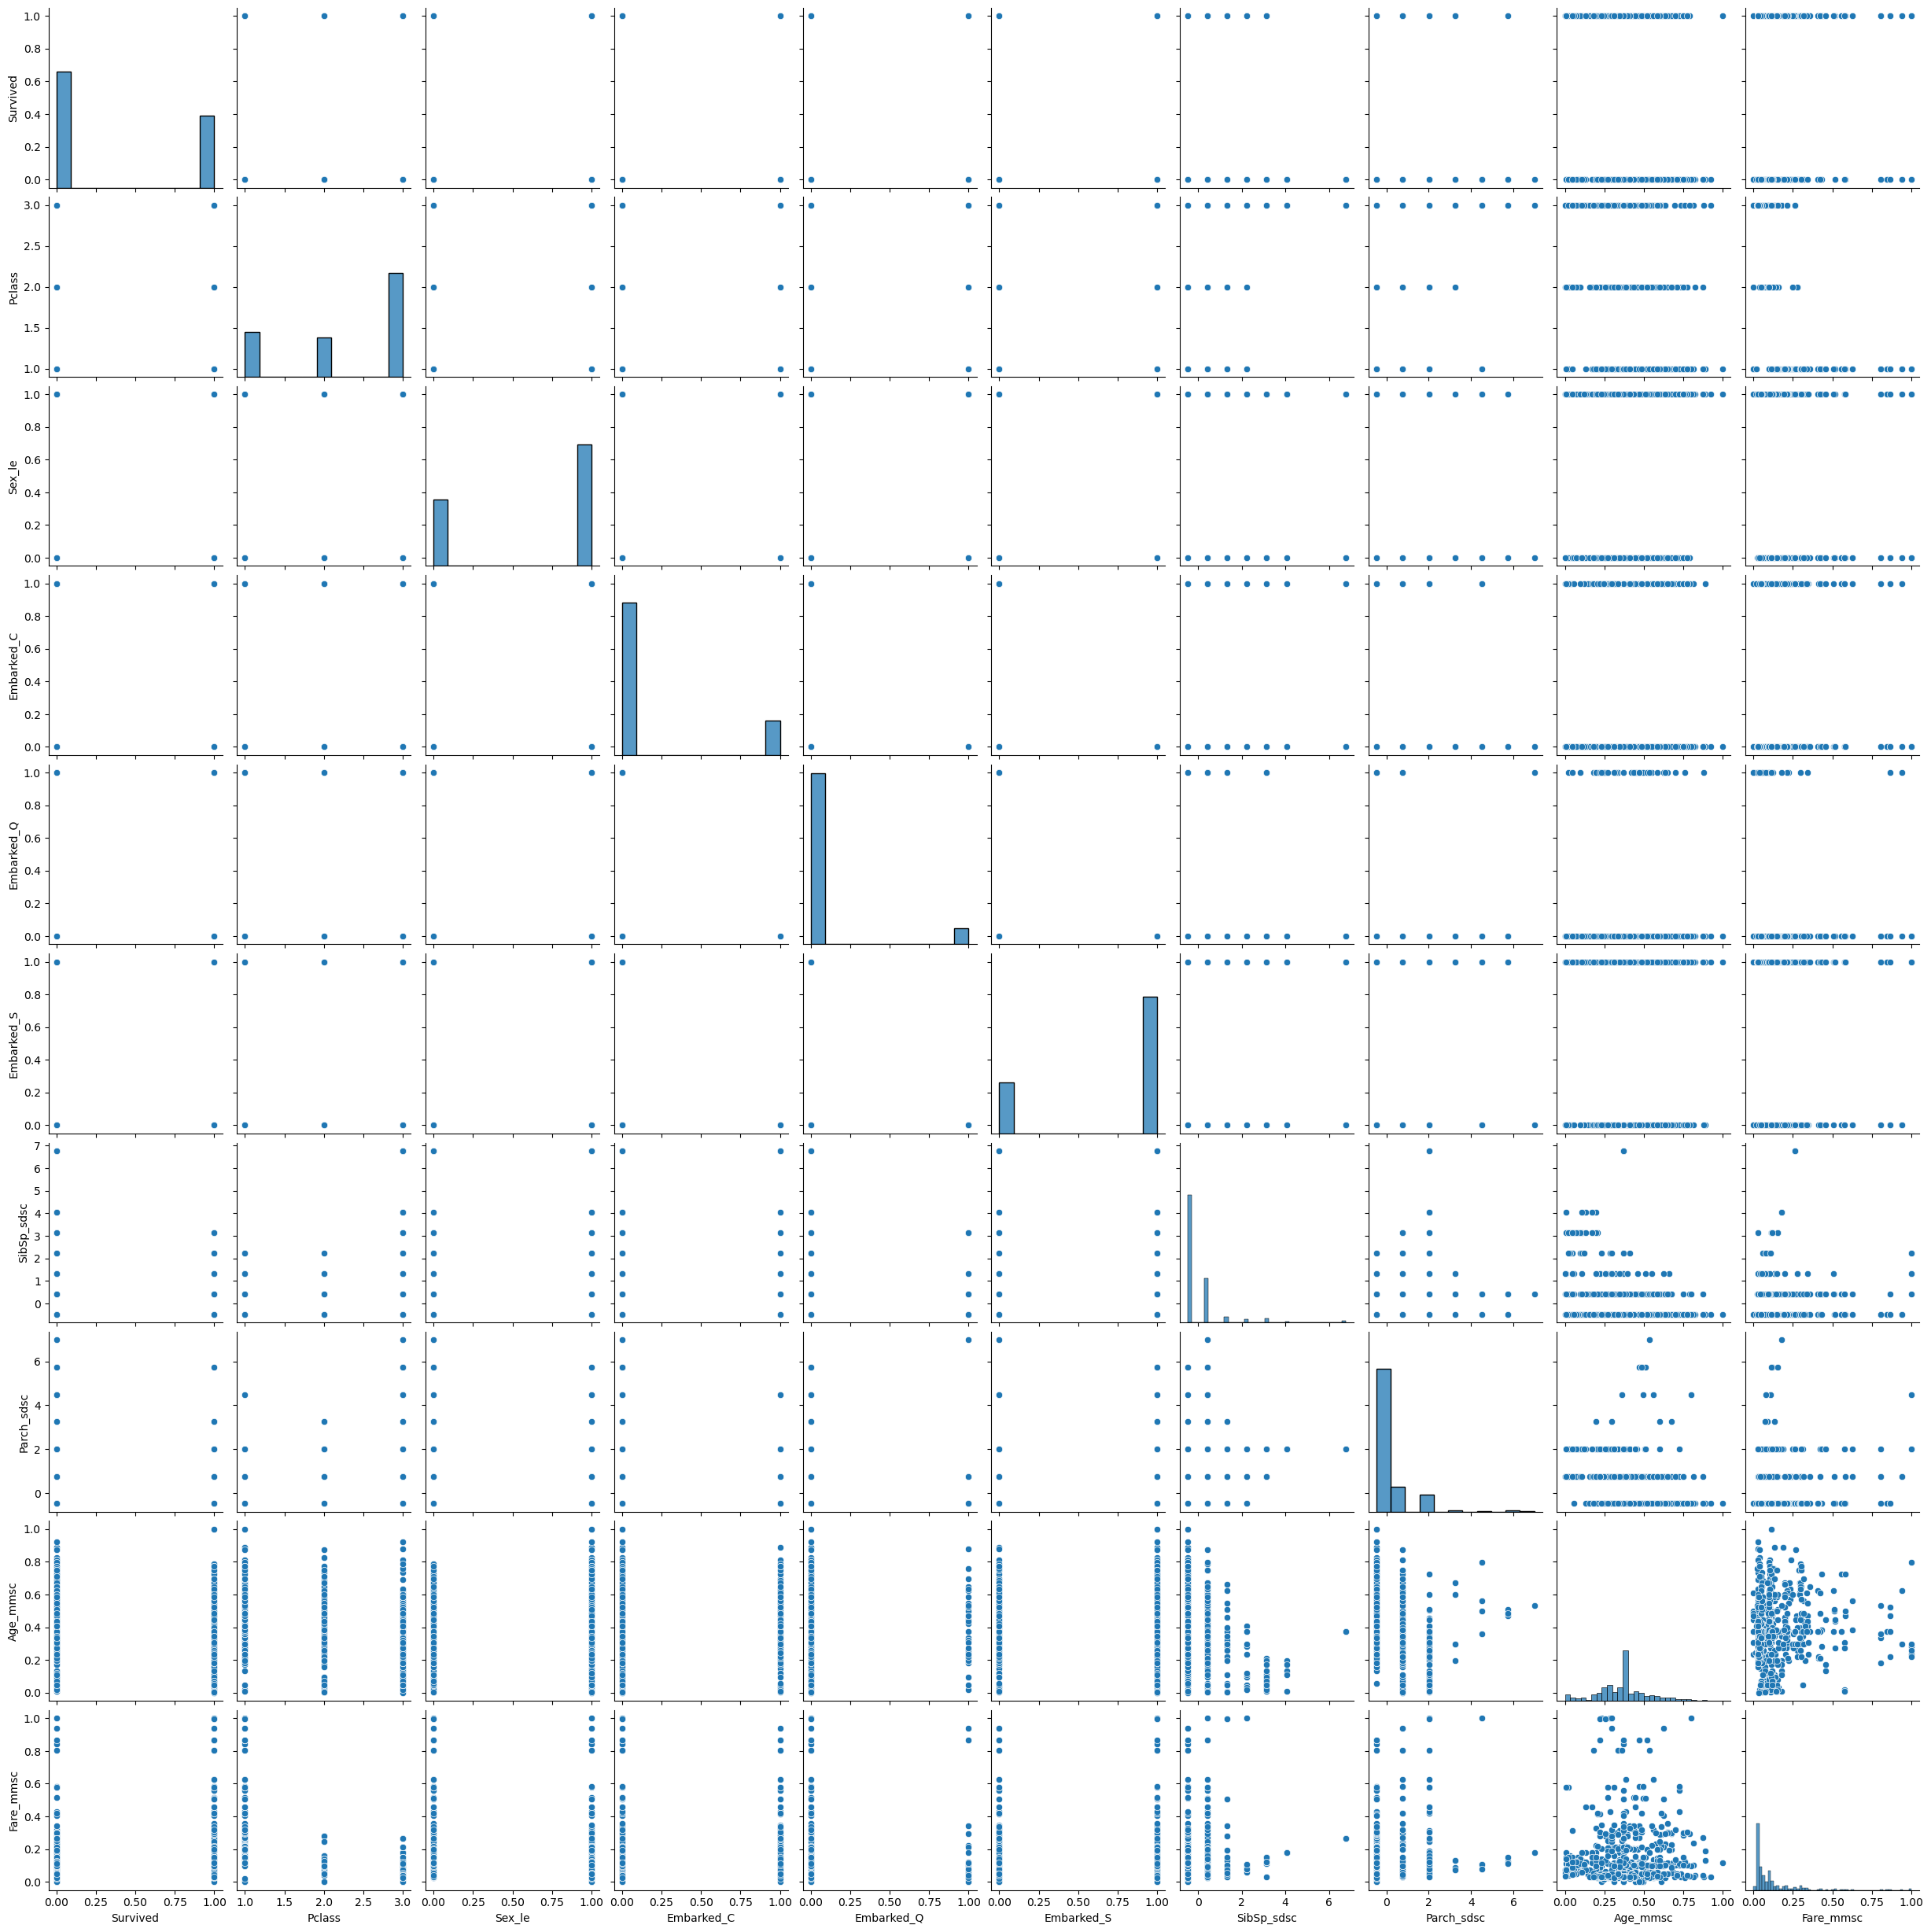

In [72]:
sns.pairplot(train_2)

## train_1, train_2 데이터 분리
- 1번 데이터와 2번 데이터를 학습 데이터와 테스트 데이터로 구분하기

In [73]:
train_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [74]:
train_2.columns

Index(['Survived', 'Pclass', 'Sex_le', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_sdsc', 'Parch_sdsc', 'Age_mmsc', 'Fare_mmsc'],
      dtype='object')

In [75]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test= train_test_split(train_1[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
                                                       , train_1['Survived']
                                                       , test_size= 0.3
                                                       , shuffle= True
                                                       , random_state= 42)
print(train_1['Survived'].shape, X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(891,) (623, 7) (268, 7) (623,) (268,)


In [76]:
X2_train, X2_test, y2_train, y2_test= train_test_split(train_2[['Survived', 'Pclass', 'Sex_le', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'SibSp_sdsc', 'Parch_sdsc', 'Age_mmsc', 'Fare_mmsc']]
                                                       , train_2['Survived']
                                                       , test_size= 0.3
                                                       , shuffle= True
                                                       , random_state= 42)
print(train_2['Survived'].shape, X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(885,) (619, 10) (266, 10) (619,) (266,)


# 5. 타이타닉 데이터 분류하기

In [77]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [78]:
# 1번 데이터 학습
forest1= RandomForestClassifier(random_state= 42)
forest1.fit(X1_train, y1_train)

RandomForestClassifier(random_state=42)

In [79]:
# 2번 데이터 학습
forest2= RandomForestClassifier(random_state= 42)
forest2.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [80]:
# 1번 데이터 평가지표 - Precision 정밀도
y1_pred = forest1.predict(X1_test)

from sklearn.metrics import precision_score
precision1= precision_score(y1_test, y1_pred)
precision1

1.0

In [81]:
# 1번 데이터 평가지표 - recall 재현율
from sklearn.metrics import recall_score
recall1= recall_score(y1_test, y1_pred)
recall1

1.0

In [82]:
# 2번 데이터 평가지표 - Precision 정밀도
y2_pred = forest2.predict(X2_test)

from sklearn.metrics import precision_score
precision2= precision_score(y2_test, y2_pred)
precision2

1.0

In [83]:
# 2번 데이터 평가지표 - recall 재현율
from sklearn.metrics import recall_score
recall2= recall_score(y2_test, y2_pred)
recall2

1.0

In [84]:
# 1번 데이터 f1-score 계산
f1score1= 2*(precision1*recall1)/(precision1+recall1)
f1score1

1.0

In [85]:
# 2번 데이터 f1-score 계산
f1score2= 2*(precision2*recall2)/(precision2+recall2)
f1score2

1.0

In [86]:
print(precision1, recall1, f1score1, precision2, recall2, f1score2)
# 정말 이상합니다...ㅜㅜ

1.0 1.0 1.0 1.0 1.0 1.0


# 6.  iris 클러스터링 시각화 

In [87]:
from sklearn.datasets import load_iris
iris6= load_iris()

iris6.feature_names
# 첫 번째 특성: 'sepal length (cm)'
# 두 번째 특성: 'sepal width (cm)'

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [88]:
iris6_df= pd.DataFrame(data= iris6.data, columns= iris.feature_names)
iris6_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [89]:
from sklearn.cluster import KMeans

# 클러스터 2개
km_two= KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, random_state= 42)
km_two.fit(iris6_df)

c:\Users\h1029\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [90]:
km_two.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
iris6_df['2cluster']= km_two.labels_
iris6_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),2cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

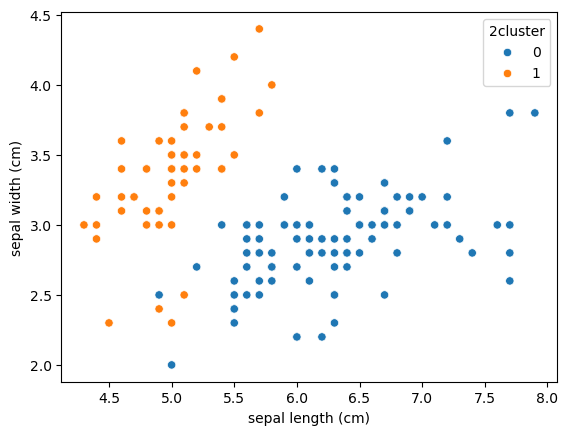

In [92]:
sns.scatterplot(iris6_df, x= 'sepal length (cm)', y= 'sepal width (cm)', hue= '2cluster')

In [93]:
# 클러스터 3개
km_three= KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state= 42)
km_three.fit(iris6_df)

c:\Users\h1029\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [94]:
km_three.labels_

array([1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
iris6_df['3cluster']= km_three.labels_
iris6_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),2cluster,3cluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,2
2,4.7,3.2,1.3,0.2,1,2
3,4.6,3.1,1.5,0.2,1,2
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0
146,6.3,2.5,5.0,1.9,0,0
147,6.5,3.0,5.2,2.0,0,0
148,6.2,3.4,5.4,2.3,0,0


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

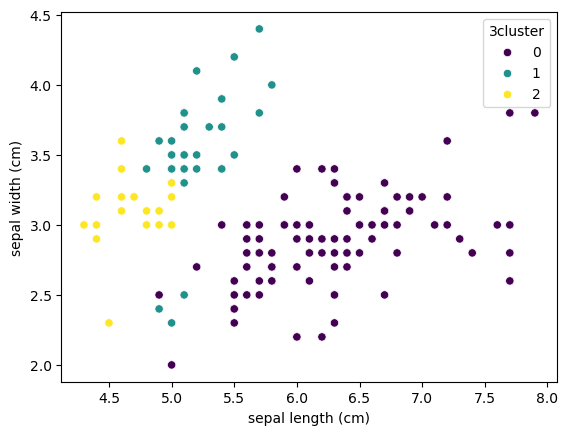

In [96]:
sns.scatterplot(iris6_df, x= 'sepal length (cm)', y= 'sepal width (cm)', hue= '3cluster', palette= 'viridis')

Text(0.5, 1.0, 'Clustering (3)')

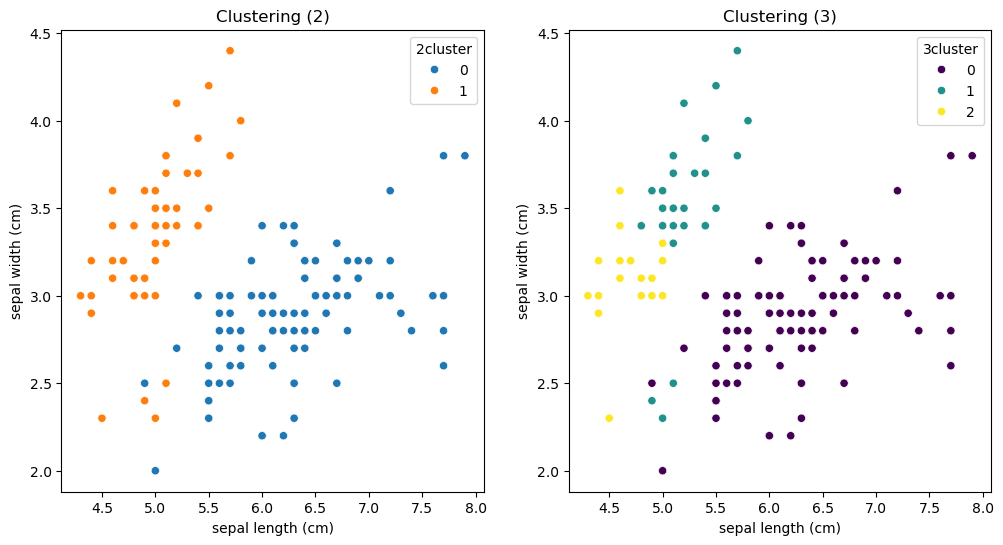

In [97]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.scatterplot(iris6_df, x= 'sepal length (cm)', y= 'sepal width (cm)', hue= '2cluster')
plt.title('Clustering (2)')

plt.subplot(1,2,2)
sns.scatterplot(iris6_df, x= 'sepal length (cm)', y= 'sepal width (cm)', hue= '3cluster', palette= 'viridis')
plt.title('Clustering (3)')
